In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("social_data.csv")

In [4]:
data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video
...,...,...,...,...,...,...,...
3474,01-03-2023 10:35,CSGO,TWITTER,N/A,0,0,Link
3475,01-03-2023 10:34,CSGO,TWITTER,N/A,0,0,Link
3476,01-03-2023 10:34,CSGO,TWITTER,N/A,0,0,Link
3477,01-03-2023 10:34,CSGO,TWITTER,N/A,2116,42,Text


In [5]:
data["engagement_rate"] = data["Total Engagements"] / data["Total Impressions"]

In [6]:
data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,engagement_rate
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text,NaN
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,NaN
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,NaN
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,NaN
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video,0.127666
...,...,...,...,...,...,...,...,...
3474,01-03-2023 10:35,CSGO,TWITTER,N/A,0,0,Link,NaN
3475,01-03-2023 10:34,CSGO,TWITTER,N/A,0,0,Link,NaN
3476,01-03-2023 10:34,CSGO,TWITTER,N/A,0,0,Link,NaN
3477,01-03-2023 10:34,CSGO,TWITTER,N/A,2116,42,Text,0.019849


In [7]:
data.describe()

,Total Impressions,Total Engagements,engagement_rate
count,3479.000000,3479.000000,2735.000000
mean,10972.453579,947.390629,0.404926
std,29577.108063,3468.628038,17.975531
min,0.000000,0.000000,0.000000
25%,167.000000,0.000000,0.014263
50%,1884.000000,39.000000,0.030864
75%,12467.000000,276.500000,0.061763
max,753227.000000,95062.000000,940.000000


In [8]:
data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,engagement_rate
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text,NaN
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,NaN
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,NaN
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,NaN
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video,0.127666
...,...,...,...,...,...,...,...,...
3474,01-03-2023 10:35,CSGO,TWITTER,N/A,0,0,Link,NaN
3475,01-03-2023 10:34,CSGO,TWITTER,N/A,0,0,Link,NaN
3476,01-03-2023 10:34,CSGO,TWITTER,N/A,0,0,Link,NaN
3477,01-03-2023 10:34,CSGO,TWITTER,N/A,2116,42,Text,0.019849


In [9]:
data.describe()

,Total Impressions,Total Engagements,engagement_rate
count,3479.000000,3479.000000,2735.000000
mean,10972.453579,947.390629,0.404926
std,29577.108063,3468.628038,17.975531
min,0.000000,0.000000,0.000000
25%,167.000000,0.000000,0.014263
50%,1884.000000,39.000000,0.030864
75%,12467.000000,276.500000,0.061763
max,753227.000000,95062.000000,940.000000


In [10]:
data["engagement_rate"].quantile(0.9)

0.13221358985528178

In [11]:
len(data[data["engagement_rate"] >= 0.15])

226

In [12]:
226/ 2735, 226/ 3479 

(0.08263254113345521, 0.06496119574590399)

In [13]:
data["Published Date"] = pd.to_datetime(data["Published Date"])
data["Account"] = data["Account"].str.strip()

In [39]:
data["weekday"] = data["Published Date"].apply(lambda d: d.strftime("%a"))
time_granularity = int(input("Enter granularity in minutes: "))
data["time_bin"] = data["Published Date"].apply(lambda d: (d.hour * 60 + d.minute) // time_granularity)

Enter granularity in minutes: 480


In [40]:
data["Account Combo"] = data["Account"] + " x " + data["Account Type"]
data["Time Combo"] = data["weekday"] + " x " + data["time_bin"].astype(str)

In [41]:
q_low = data["engagement_rate"].quantile(0.1)
q_hi  = data["engagement_rate"].quantile(0.9)

df_filtered = data[(data["engagement_rate"] < q_hi) & (data["engagement_rate"] > q_low)]

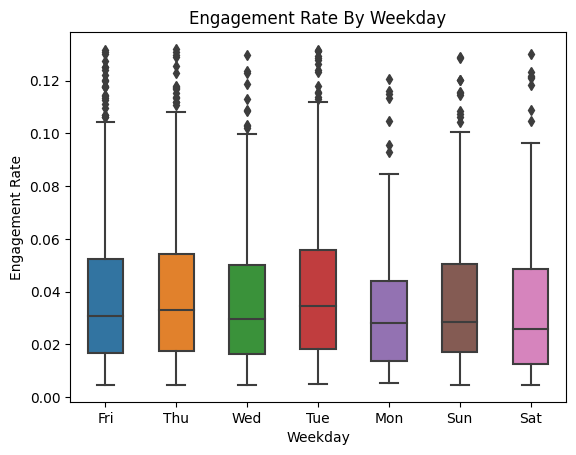

In [42]:
sns.boxplot(y='engagement_rate', x='weekday', 
                 data=df_filtered, 
                 width=0.5)
plt.title("Engagement Rate By Weekday")
plt.suptitle("")
plt.xlabel("Weekday")
plt.ylabel("Engagement Rate")
plt.show()

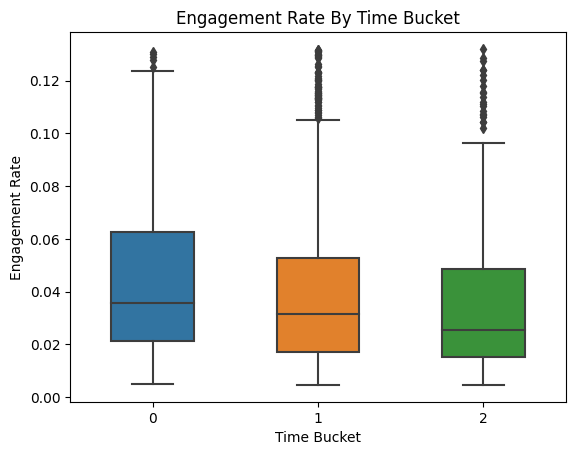

In [43]:
sns.boxplot(y='engagement_rate', x='time_bin', 
                 data=df_filtered, 
                 width=0.5)
plt.title("Engagement Rate By Time Bucket")
plt.suptitle("")
plt.xlabel("Time Bucket")
plt.ylabel("Engagement Rate")
plt.show()

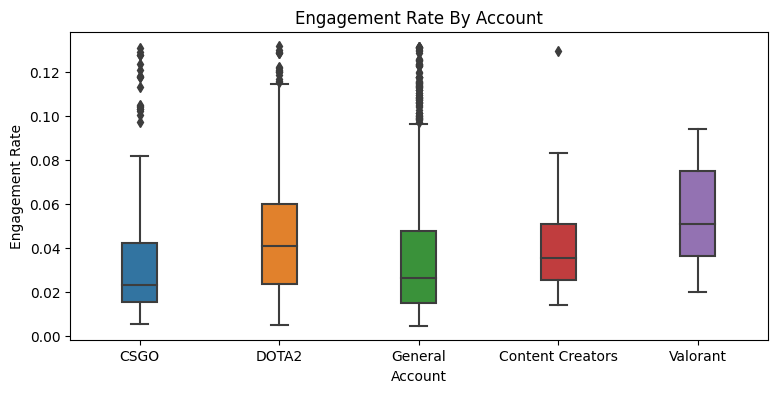

In [44]:
plt.figure(figsize=(9,4))
sns.boxplot(y='engagement_rate', x='Account', 
                 data=df_filtered, 
                 width=0.25)
plt.title("Engagement Rate By Account")
plt.suptitle("")
plt.xlabel("Account")
plt.ylabel("Engagement Rate")
plt.show()

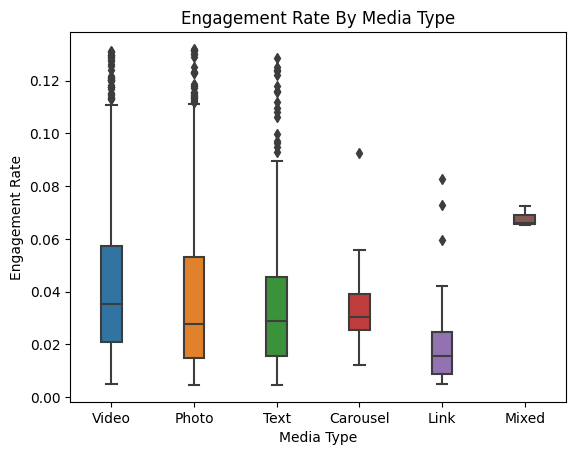

In [45]:
sns.boxplot(y='engagement_rate', x='Media Type', 
                 data=df_filtered, 
                 width=0.25)
plt.title("Engagement Rate By Media Type")
plt.suptitle("")
plt.xlabel("Media Type")
plt.ylabel("Engagement Rate")
plt.show()

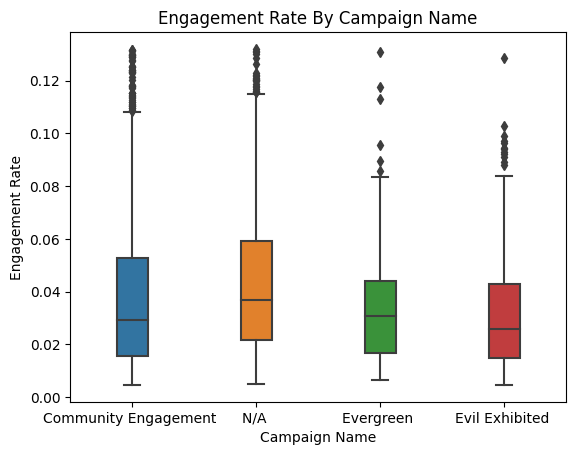

In [46]:
sns.boxplot(y='engagement_rate', x='Campaign Name', 
                 data=df_filtered, 
                 width=0.25)
plt.title("Engagement Rate By Campaign Name")
plt.suptitle("")
plt.xlabel("Campaign Name")
plt.ylabel("Engagement Rate")
plt.show()

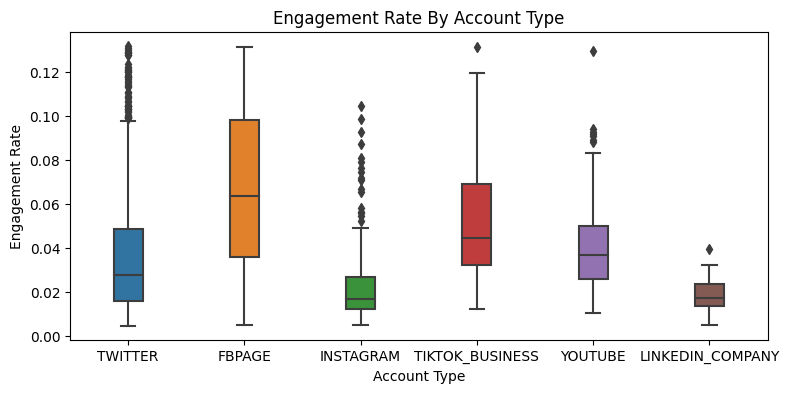

In [47]:
plt.figure(figsize=(9,4))
sns.boxplot(y='engagement_rate', x='Account Type', 
                 data=df_filtered, 
                 width=0.25)
plt.title("Engagement Rate By Account Type")
plt.suptitle("")
plt.xlabel("Account Type")
plt.ylabel("Engagement Rate")
plt.show()

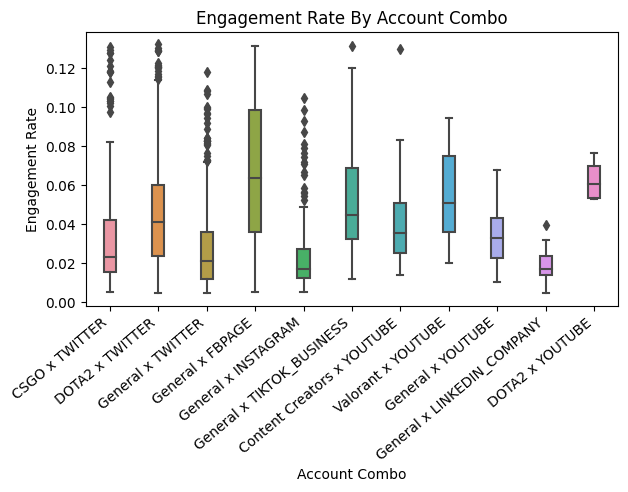

In [48]:
bp = sns.boxplot(y='engagement_rate', x='Account Combo', 
                 data=df_filtered, 
                 width=0.25)
bp.set_xticklabels(bp.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Engagement Rate By Account Combo")
plt.suptitle("")
plt.xlabel("Account Combo")
plt.ylabel("Engagement Rate")
plt.show()

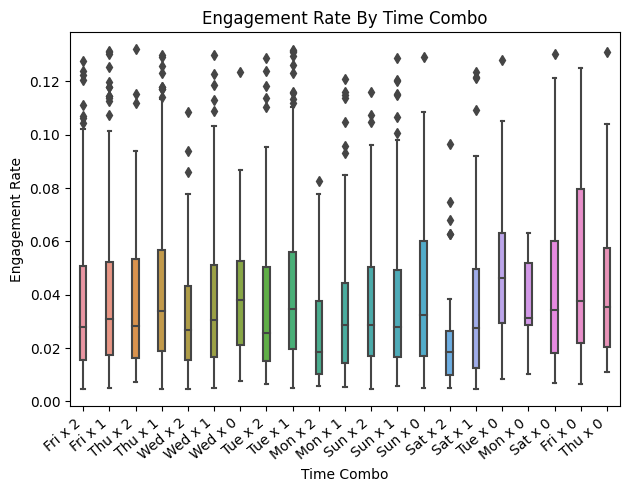

In [51]:
bp = sns.boxplot(y='engagement_rate', x='Time Combo', 
                 data=df_filtered, 
                 width=0.25)
bp.set_xticklabels(bp.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Engagement Rate By Time Combo")
plt.suptitle("")
plt.xlabel("Time Combo")
plt.ylabel("Engagement Rate")
plt.show()